In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

# Part 1

In [2]:
alpha = 1
sampling_steps = 0.25
sf = int(1/sampling_steps)
start = -2
stop = 10
n = np.arange(start, stop, sampling_steps)
h = np.array([1 if t>=0 else 0 for t in n])
x = np.exp(-alpha*n)*h

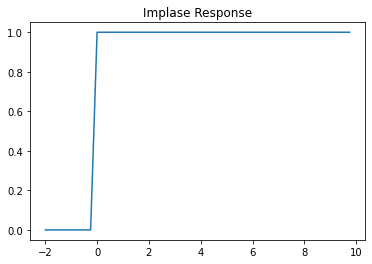

In [3]:
plt.plot(n, h)
plt.title("Implase Response")
plt.show()

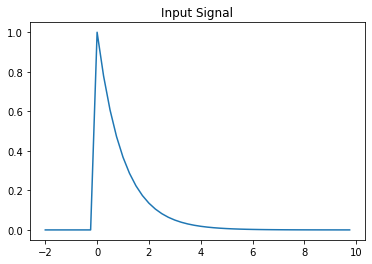

In [4]:
plt.plot(n, x)
plt.title("Input Signal")
plt.show()

In [5]:
conv_range_start = (-start)*sf
conv_range_stop = (stop-start)*sf + conv_range_start

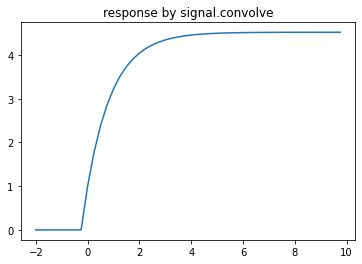

In [6]:
y = signal.convolve(x, h, mode='full')
plt.plot(n, y[conv_range_start:conv_range_stop])
plt.title("response by signal.convolve")
plt.show()

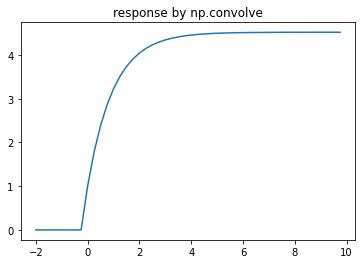

In [7]:
y = np.convolve(x, h, mode='full')
plt.plot(n, y[conv_range_start:conv_range_stop])
plt.title("response by np.convolve")
plt.show()

In [8]:
y = y[conv_range_start:conv_range_stop]
scaling_factor = 1/(1-np.exp(-alpha*sampling_steps))
print(scaling_factor)

4.520811664187799


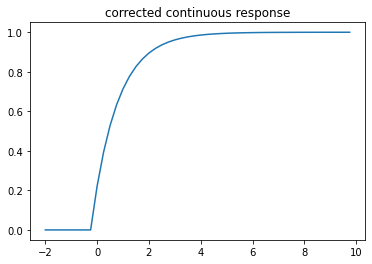

In [9]:
y = y / scaling_factor
plt.plot(n, y)
plt.title("corrected continuous response")
plt.show()

# Part 2

In [10]:
sampling_steps = 0.25
sf = int(1/sampling_steps)
start = -5
stop = 10
t = np.arange(start, stop, sampling_steps)
h = np.piecewise(t, [t < 0, 0 <= t], [lambda t: 0, lambda t: 1])
x = np.piecewise(
    t,
    [t <= -2, ((-2 < t) & (t < -1)), ((-1 <= t) & (t <= 1)), ((1 < t) & (t < 2)), 2 <= t],
    [lambda t: 0, lambda t: t+2, lambda t: 1, lambda t: 2-t, lambda t: 0]
)

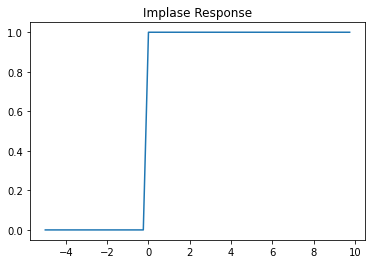

In [11]:
plt.plot(t, h)
plt.title("Implase Response")
plt.show()

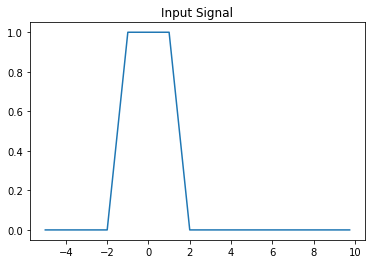

In [12]:
plt.plot(t, x)
plt.title("Input Signal")
plt.show()

In [13]:
conv_range_start = -start*sf
conv_range_stop = (stop+2)*sf + conv_range_start
t_range_stop = (stop+2)*sf

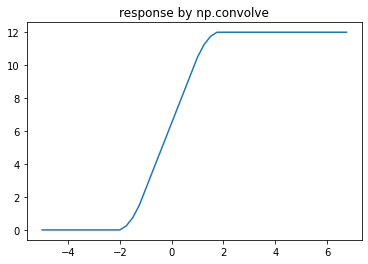

In [14]:
y = np.convolve(h, x, mode='full')
plt.plot(t[:t_range_stop], y[conv_range_start:conv_range_stop])
plt.title("response by np.convolve")
plt.show()

# Part 3

In [15]:

sampling_steps = 0.2
sf = int(1/sampling_steps)
start = -10
stop = 10
t = np.arange(start, stop, sampling_steps)

def impulse_train(T):
    n = T*sf
    it = np.zeros((stop-start)*sf)
    for i in range(int(it.size/n)):
        it[i*n:(i+1)*n] = signal.unit_impulse(n, 'mid')
    return it

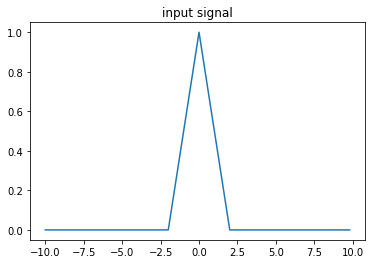

In [16]:
x = np.piecewise(
    t,
    [t <= -2, ((-2 < t) & (t <= 0 )), ((0 < t) & (t < 2)), 2 <= t],
    [lambda t: 0, lambda t: 1+t/2, lambda t: 1-t/2, lambda t: 0]
)

plt.plot(t, x)
plt.title("input signal")
plt.show()

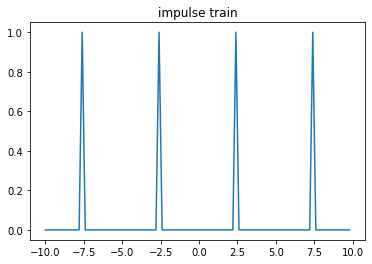

In [17]:
plt.plot(t,  impulse_train(5))
plt.title("impulse train")
plt.show()

In [18]:
plot_range = 6
conv_range_start = (stop-start-plot_range)*sf
conv_range_stop = 2*plot_range*sf + conv_range_start
t_axis = t[(-plot_range-start)*sf:(plot_range-start)*sf]

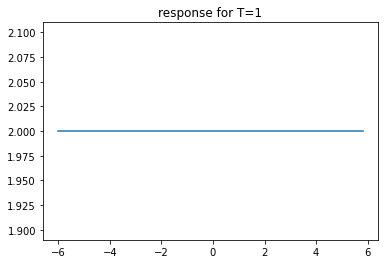

In [19]:
y = signal.convolve(x, impulse_train(1), mode='full')
plt.plot(t_axis, y[conv_range_start:conv_range_stop])
plt.title("response for T=1")
plt.show()

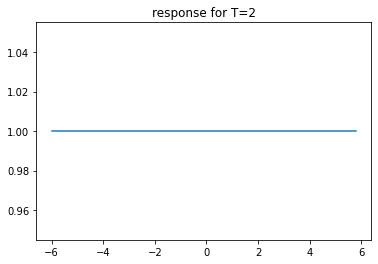

In [20]:
y = signal.convolve(x, impulse_train(2), mode='full')
plt.plot(t_axis, y[conv_range_start:conv_range_stop])
plt.title("response for T=2")
plt.show()

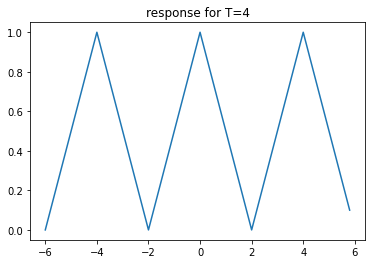

In [21]:
y = signal.convolve(x, impulse_train(4), mode='full')
plt.plot(t_axis, y[conv_range_start:conv_range_stop])
plt.title("response for T=4")
plt.show()

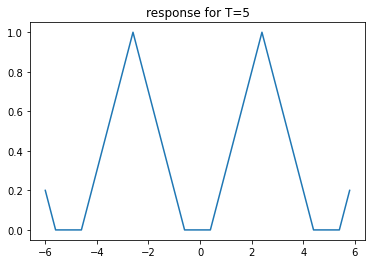

In [22]:
y = signal.convolve(x, impulse_train(5), mode='full')
plt.plot(t_axis, y[conv_range_start:conv_range_stop])
plt.title("response for T=5")
plt.show()